In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import math

# Carregando o conjunto de dados

In [2]:
covid = pd.read_csv('covid_pre_proc.csv')
del covid['Unnamed: 0']

In [3]:
covid.head()

,localCaso,sexoCaso,dataNascimento,idadeCaso,racaCor,resultadoFinalExame
0,SOBRAL,MASCULINO,14/08/2003,17.0,Parda,Negativo
1,PACAJUS,MASCULINO,07/11/1983,37.0,Parda,Negativo
2,FORTALEZA,MASCULINO,12/03/1992,28.0,Parda,Negativo
3,CAUCAIA,MASCULINO,06/03/1970,50.0,Sem Informacao,Negativo
4,FORTALEZA,FEMININO,10/01/1939,81.0,Parda,Negativo


# Consultas

**Q1:** Qual o município (atributo *municipioCaso*) com o menor número de casos positivos (atributo *resultadoFinalExame*) de COVID-19;

In [4]:
def Q1(df: pd.DataFrame):
    dict_locais_posit = dict(df['localCaso'][df['resultadoFinalExame'] == 'Positivo'].value_counts())
    
    return min(dict_locais_posit, key=lambda k: dict_locais_posit[k])

**Q2:** Qual a raça (atributo *Raca*) com o maior número de casos negativos de COVID-19;

In [5]:
def Q2(df: pd.DataFrame):
    dict_raca_neg = dict(df['racaCor'][df['resultadoFinalExame'] == 'Negativo'].value_counts())
    
    return max(dict_raca_neg, key=lambda k: dict_raca_neg[k])

# Funções auxiliares

### Funções de utilidade

In [6]:
def scores_Q1(df: pd.DataFrame) -> dict:
    return dict(df['localCaso'][df['resultadoFinalExame'] == 'Positivo'].value_counts())

In [7]:
def scores_Q2(df: pd.DataFrame) -> dict:
    return dict(df['racaCor'][df['resultadoFinalExame'] == 'Negativo'].value_counts())

### Função que calcula a sensibilidade

In [8]:
def delta_u(scores: dict) -> int:
    scores_ = scores.values()
    
    return max(scores_) - min(scores_)

# Mecanismo Exponencial

In [50]:
def exponential(budget: float, scores: dict, show_plot=True) -> str:
    probabilities = []
    sensitivity = delta_u(scores)
    
    for i in range(len(scores)):
        probability = math.exp((budget*(list(scores.values())[i])) / (2*sensitivity))
        probabilities.append(probability)
        
    probabilities = [probabilities[j]/sum(probabilities) for j in range(len(probabilities))]
    #print([(k,p) for k, p in zip(list(scores.keys()), probabilities)])
    
    output = random.choices(population=list(scores.keys()), weights=probabilities, k=1)[0]
    
    if show_plot:
        plt.plot(probabilities, scaley=False)
        plt.title('Probabilidade de cada chave ser escolhida com eps = {}\n'.format(budget))
        plt.show()
    
    return output

### Executando o mecanismo para todos os valores de epsilon e para todas as consultas

In [51]:
epsilon = [0.1, 0.5, 1, 10]
queries = [Q1, Q2]


------------------------------ CONSULTA Q1 ------------------------------


------------------------------ EPSILON = 0.1 ------------------------------



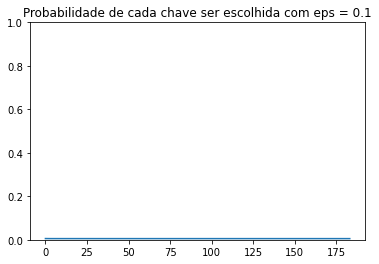

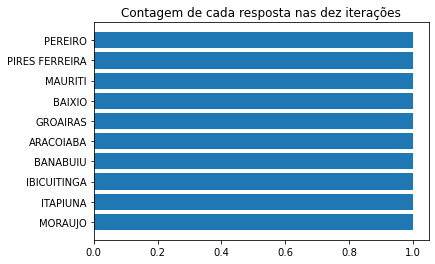



------------------------------ EPSILON = 0.5 ------------------------------



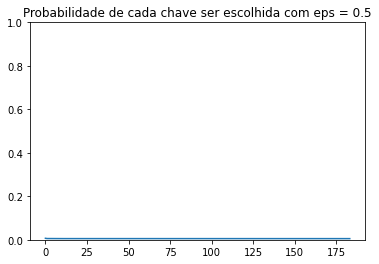

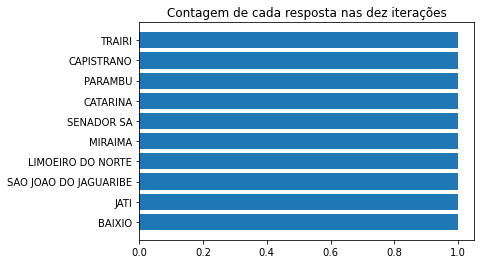



------------------------------ EPSILON = 1 ------------------------------



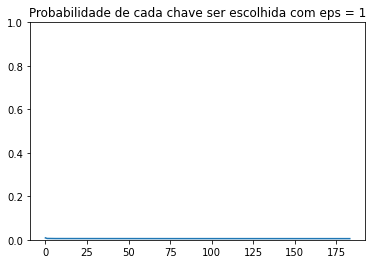

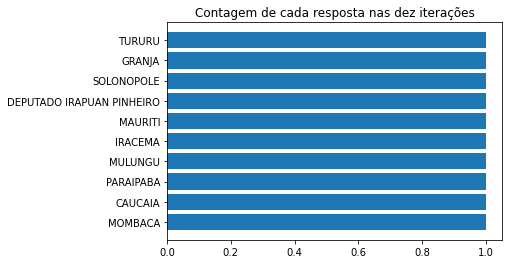



------------------------------ EPSILON = 10 ------------------------------



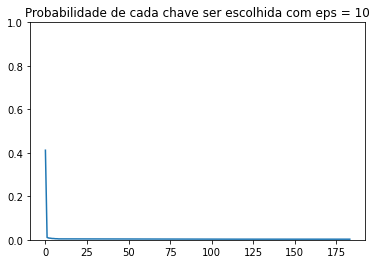

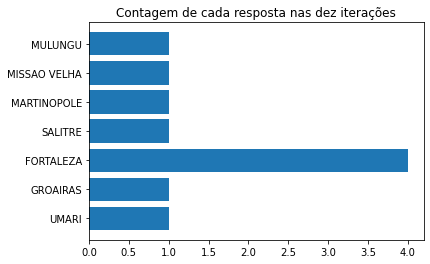


------------------------------ CONSULTA Q2 ------------------------------


------------------------------ EPSILON = 0.1 ------------------------------



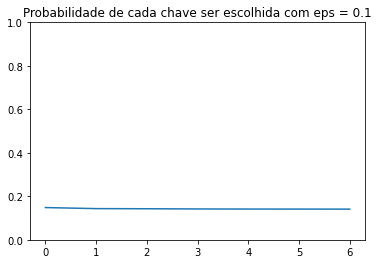

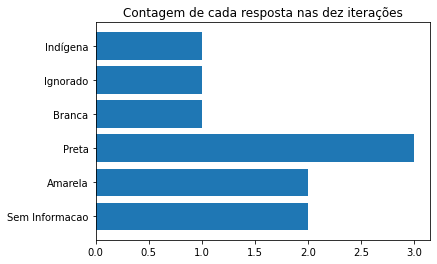



------------------------------ EPSILON = 0.5 ------------------------------



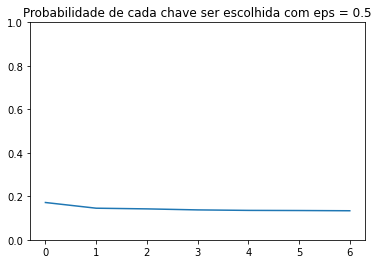

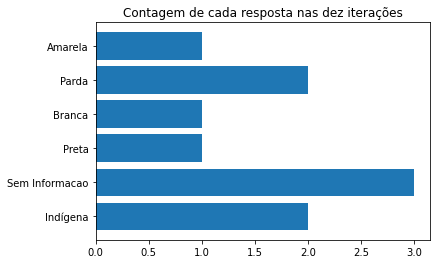



------------------------------ EPSILON = 1 ------------------------------



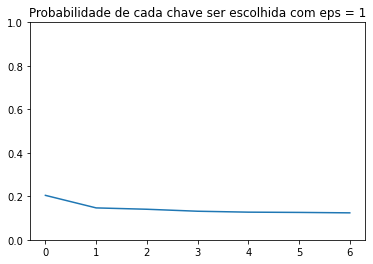

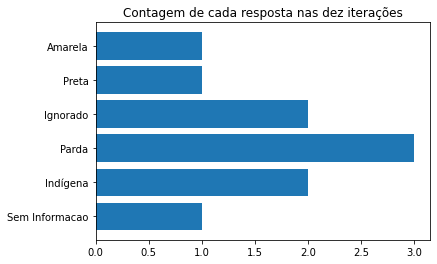



------------------------------ EPSILON = 10 ------------------------------



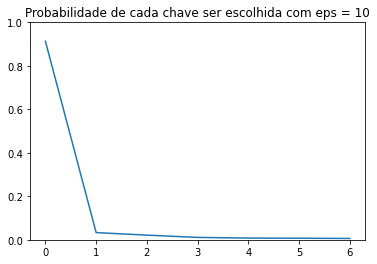

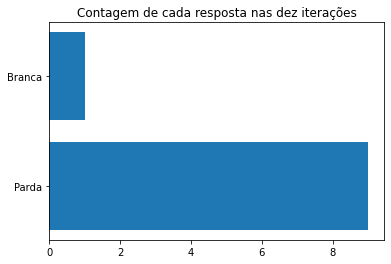

In [66]:
results_queries = []

for q in queries:
    print('\n{} CONSULTA {} {}'.format('-'*30, q.__name__, '-'*30))
    query_eps = {}
    for eps in epsilon:
        show = True
        query_eps_i = []
        print('\n\n{} EPSILON = {} {}\n'.format('-'*30, eps,'-'*30))
        for _ in range(10):
            scores_q = locals()['scores_{}'.format(q.__name__)](covid)
            result_i = exponential(eps, scores_q, show_plot=show)
            show = False
            query_eps_i.append(result_i)
        plt.barh(query_eps_i, [query_eps_i.count(i) for i in query_eps_i])
        plt.title('Contagem de cada resposta nas dez iterações')
        plt.show()
        query_eps[eps] = max(set(query_eps_i), key=query_eps_i.count)
    results_queries.append(query_eps)

In [67]:
results_queries

[{0.1: 'BANABUIU', 0.5: 'CAPISTRANO', 1: 'CAUCAIA', 10: 'FORTALEZA'},
 {0.1: 'Preta', 0.5: 'Sem Informacao', 1: 'Parda', 10: 'Parda'}]

# Menu